In [56]:
import pandas
import numpy
import datetime
from matplotlib import pyplot

In [3]:
df = pandas.read_csv('openpv_all.csv',engine='python')


In [4]:
df['date'] = pandas.to_datetime(df['date_installed']).apply(lambda dt: dt.replace(day=15))

In [5]:
df['year'] = df['date_installed'].str.slice(-4).astype(float)
df['count'] = 1
df['rebates']=df['rebate'].str.strip('$-').str.replace(',','').astype(float)
df['pct_reported_prod'] = 100*df.reported_annual_energy_prod/df.annual_PV_prod
df['install_type'] = df['install_type'].str.lower().str.split().str[0]

In [6]:
rdf = df[(df['install_type']=='residential')]
cdf = df[(df['install_type']=='commercial')]

In [7]:
[(col,len(df[col].dropna())) for col in df]

[('state', 1020671),
 ('date_installed', 1020666),
 ('incentive_prog_names', 797958),
 ('type', 1020666),
 ('size_kw', 1020666),
 ('appraised', 224036),
 ('zipcode', 1020666),
 ('install_type', 978090),
 ('installer', 702607),
 ('cost_per_watt', 763089),
 ('cost', 763250),
 ('lbnl_tts_version_year', 797958),
 ('lbnl_tts', 797958),
 ('city', 799104),
 ('utility_clean', 792720),
 ('tech_1', 580919),
 ('model1_clean', 580919),
 ('county', 998652),
 ('annual_PV_prod', 780969),
 ('annual_insolation', 780969),
 ('rebate', 386698),
 ('sales_tax_cost', 355309),
 ('tilt1', 383365),
 ('tracking_type', 526058),
 ('azimuth1', 363281),
 ('manuf2_clean', 231607),
 ('manuf3_clean', 209653),
 ('manuf1_clean', 201121),
 ('inv_man_clean', 49933),
 ('reported_annual_energy_prod', 204429),
 ('incentivetype', 0),
 ('year_app_implied', 0),
 ('year', 1020666),
 ('npv_fit_real', 0),
 ('application_implied', 0),
 ('npv_pbi_real', 0),
 ('other_incentive', 0),
 ('appraised_cluster', 0),
 ('inflation', 0),
 ('oth

In [7]:
df['utility_clean'].value_counts()

Pacific Gas & Electric Company               215183
Southern California Edison                   164476
San Diego Gas & Electric Company              70941
National Grid                                 42328
Arizona Public Service                        40647
Los Angeles Department of Water & Power       19757
PSEG Long Island                              18015
NSTAR (DBA EverSource)                        16698
JCP&L                                         16438
PSE&G BPU                                     15883
Salt River Project                            15275
Connecticut Light and Power                   13391
Nevada Power                                  12766
Sacramento Municipal Utility District         11698
Tucson Electric Power                         10921
AC Electric                                    8948
Consolidated Edison                            5894
Baltimore Gas & Electric Co                    5212
Austin Energy                                  4688
Public Servi

In [13]:
df[(df['reported_annual_energy_prod']>0.)]['annual_PV_prod'].value_counts()

10255.836910    790
15383.755370    695
11965.143070    692
12819.796140    663
8546.530762     598
11110.489990    542
14101.775760    526
13537.704730    517
9401.183838     502
8614.903008     498
8649.089131     491
15650.407130    481
11486.537340    458
7691.877686     433
17947.714600    412
15999.105590    407
8837.112808     405
16665.734990    404
9025.136484     403
6837.224609     400
13414.634680    393
13674.449220    390
5127.918457     373
10666.070390    361
14768.405160    354
9845.603437     353
10683.163450    329
8973.857300     319
5982.571533     316
20511.673830    309
               ... 
6443.748585       1
13824.438630      1
5435.787048       1
4135.512678       1
8068.850177       1
10210.978130      1
8099.766992       1
8929.028320       1
10953.577540      1
10744.431910      1
6388.932393       1
7415.248718       1
10614.162080      1
9341.027649       1
3848.886577       1
5698.537903       1
12836.564760      1
3546.705227       1
12680.781370      1


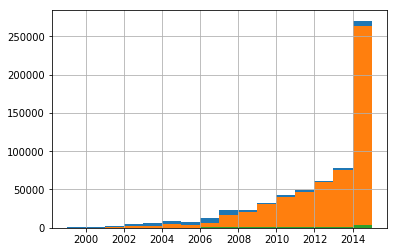

In [20]:
ahist=df[(df['state']=='CA')]['year'].hist(bins=[x for x in range(1999,2016)])
ahist=rdf[(rdf['state']=='CA')]['year'].hist(bins=[x for x in range(1999,2016)])
ahist=cdf[(cdf['state']=='CA')]['year'].hist(bins=[x for x in range(1999,2016)])


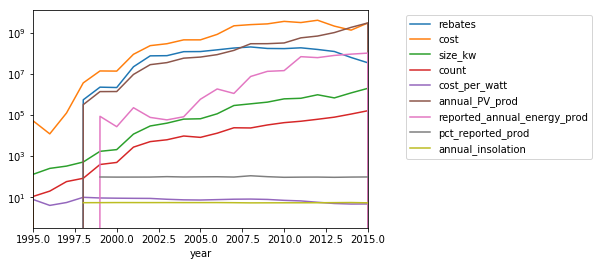

In [24]:
this_state = df['state'].value_counts().index[0]
ax1=df[(df['state']==this_state)].groupby(['year']).sum()['rebates'].plot(logy=True,xlim=(1995,2015))
ax1=df[(df['state']==this_state)].groupby(['year']).sum()['cost'].plot(logy=True,xlim=(1995,2015))
ax1=df[(df['state']==this_state)].groupby(['year']).sum()['size_kw'].plot(logy=True,xlim=(1995,2015))
ax1=df[(df['state']==this_state)].groupby(['year']).sum()['count'].plot(logy=True,xlim=(1995,2015))
ax1=df[(df['state']==this_state)].groupby(['year']).mean()['cost_per_watt'].plot(logy=True,xlim=(1995,2015))
ax1=df[(df['state']==this_state)].groupby(['year']).sum()['annual_PV_prod'].plot(logy=True,xlim=(1995,2015))
ax1=df[(df['state']==this_state)].groupby(['year']).sum()['reported_annual_energy_prod'].plot(logy=True,xlim=(1995,2015))
ax1=df[(df['state']==this_state)].groupby(['year']).mean()['pct_reported_prod'].plot(logy=True,xlim=(1995,2015))
ax1=df[(df['state']==this_state)].groupby(['year']).mean()['annual_insolation'].plot(logy=True,xlim=(1995,2015))
ax1.legend(bbox_to_anchor=(1.1, 1.0))

In [8]:
this_state = df['state'].value_counts().index[1]
ax1=df[(df['state']==this_state)].groupby(['date']).sum()['rebates'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=df[(df['state']==this_state)].groupby(['date']).sum()['cost'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=df[(df['state']==this_state)].groupby(['date']).sum()['size_kw'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=df[(df['state']==this_state)].groupby(['date']).sum()['count'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=df[(df['state']==this_state)].groupby(['date']).mean()['cost_per_watt'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=df[(df['state']==this_state)].groupby(['date']).sum()['annual_PV_prod'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=df[(df['state']==this_state)].groupby(['date']).sum()['reported_annual_energy_prod'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=df[(df['state']==this_state)].groupby(['date']).mean()['pct_reported_prod'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=df[(df['state']==this_state)].groupby(['date']).mean()['annual_insolation'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1.legend(bbox_to_anchor=(1.1, 1.0))

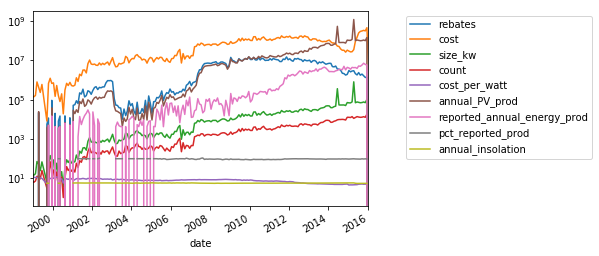

In [12]:
this_state = rdf['state'].value_counts().index[0]
ax1=rdf[(rdf['state']==this_state)].groupby(['date']).sum()['rebates'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=rdf[(rdf['state']==this_state)].groupby(['date']).sum()['cost'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=rdf[(rdf['state']==this_state)].groupby(['date']).sum()['size_kw'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=rdf[(rdf['state']==this_state)].groupby(['date']).sum()['count'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=rdf[(rdf['state']==this_state)].groupby(['date']).mean()['cost_per_watt'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=rdf[(rdf['state']==this_state)].groupby(['date']).sum()['annual_PV_prod'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=rdf[(rdf['state']==this_state)].groupby(['date']).sum()['reported_annual_energy_prod'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=rdf[(rdf['state']==this_state)].groupby(['date']).mean()['pct_reported_prod'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=rdf[(rdf['state']==this_state)].groupby(['date']).mean()['annual_insolation'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1.legend(bbox_to_anchor=(1.1, 1.0))

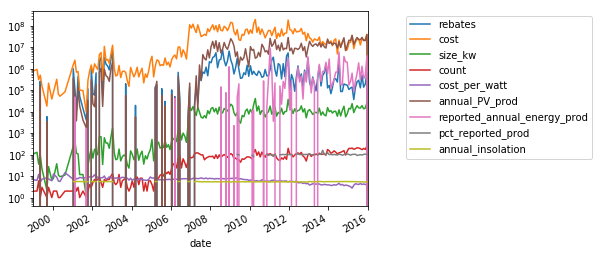

In [13]:
this_state = cdf['state'].value_counts().index[0]
ax1=cdf[(cdf['state']==this_state)].groupby(['date']).sum()['rebates'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=cdf[(cdf['state']==this_state)].groupby(['date']).sum()['cost'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=cdf[(cdf['state']==this_state)].groupby(['date']).sum()['size_kw'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=cdf[(cdf['state']==this_state)].groupby(['date']).sum()['count'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=cdf[(cdf['state']==this_state)].groupby(['date']).mean()['cost_per_watt'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=cdf[(cdf['state']==this_state)].groupby(['date']).sum()['annual_PV_prod'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=cdf[(cdf['state']==this_state)].groupby(['date']).sum()['reported_annual_energy_prod'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=cdf[(cdf['state']==this_state)].groupby(['date']).mean()['pct_reported_prod'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1=cdf[(cdf['state']==this_state)].groupby(['date']).mean()['annual_insolation'].plot(logy=True,xlim=(datetime.datetime(1999, 1, 1, 0, 0)
,datetime.datetime(2016, 1, 1, 0, 0)))
ax1.legend(bbox_to_anchor=(1.1, 1.0))

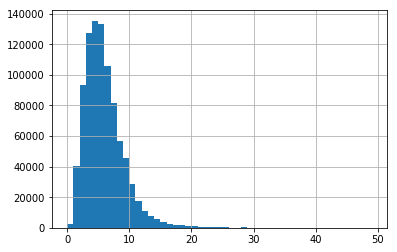

In [52]:
rdf['size_kw'].hist(bins=range(0,50,1))


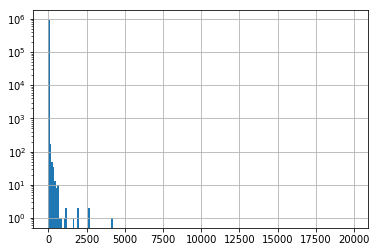

In [65]:
fig, ax = pyplot.subplots()
rdf['size_kw'].hist(bins=range(0,20000,100))
ax.set_yscale('log')

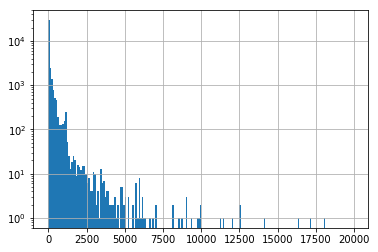

In [64]:
fig, ax = pyplot.subplots()
cdf['size_kw'].hist(bins=range(0,20000,100))
ax.set_yscale('log')

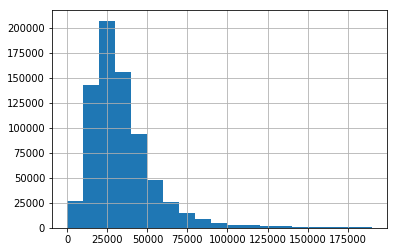

In [15]:
df['cost'].hist(bins = range(0,200000,10000))

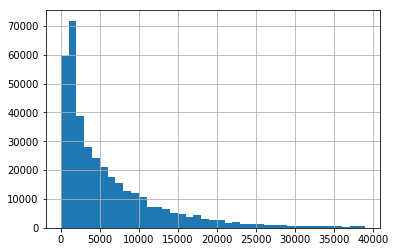

In [16]:
df['rebates'].dropna().hist(bins = range(0,40000,1000))

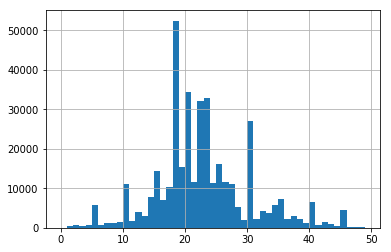

In [17]:
df['tilt1'].dropna().hist(bins=range(0,50,1))

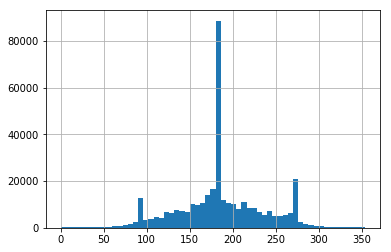

In [18]:
df['azimuth1'].hist(bins=range(0,360,6))